# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def roll_dice(n):
    options = [1,2,3,4,5,6]
    dice = random.choices(options, k = n)
    df = pd.DataFrame(dice)
    return df

df = roll_dice(10)
df

,0
0,5
1,3
2,6
3,5
4,6
5,2
6,4
7,2
8,3
9,5


#### 2.- Plot the results sorted by value.

In [3]:
df1 = df.sort_values(by = 0).reset_index()[0]
df1

0    2
1    2
2    3
3    3
4    4
5    5
6    5
7    5
8    6
9    6
Name: 0, dtype: int64

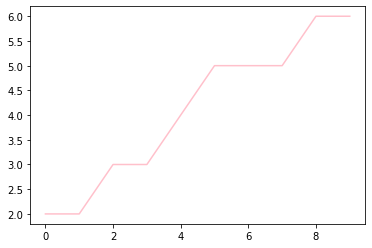

In [4]:
plt.plot(range(len(df1)),df1, color = "pink")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

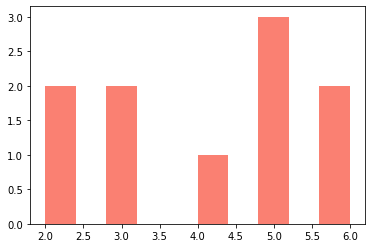

In [5]:
plt.hist(df1, color = "salmon")
plt.show()

In [6]:
#The first graph is cumulative graph (whenever that result happens the line shows that)
#and the second graph shows the frequency of each option that occurs when we roll the dice.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def mean_calc(x):
    mean = sum(x)/len(x)
    return mean

print(mean_calc(df1))

4.1


In [8]:
#Using the formula

mean_by_form = np.mean(df1)
print(mean_by_form)

4.1


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# Find the uniques values of the dice
uniques = df1.unique()
uniques

# Create a dictionary to update the frequencies of each roll
freqs={}

for number in df1:
    if number in freqs:
        freqs[number]+=1
    else:
        freqs[number]=1

print(freqs)

# For the sum of the all the frequencies per option of the dice:
nominator = 0

for key, value in freqs.items():
    x = key * value
    nominator = nominator + x

print(nominator)

# For the below part of the formula to calculate the mean

denominator = len(df1)
print(denominator)

# Calculation of the mean
mean_new = nominator / denominator
mean_new

{2: 2, 3: 2, 4: 1, 5: 3, 6: 2}
41
10


4.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
df1.sort_values()

def call_med(n):
    n = n.sort_values()
    if len(n) % 2 == 0:
        median = (n[(len(n)/2) - 1] +  n[(len(n)/2) + 1]) / 2
    else:
        median = n[(len(n)/2)]
    return median

call_med(df1)

4.5

In [11]:
# Using the formula

median = np.median(df1)
median

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [12]:
df1.sort_values()

def calc_quartiles(n):
    len_n = len(n)
    
    q2 = call_med(n)
    q4 = max(n)
    
    if len_n * 0.25 % 2 == 0 and len_n * 0.75 % 2 == 0 :
        q1 = (n[int((len_n * 0.25) + 1)] + n[int((len_n * 0.25) - 1)])/2
        q3 = (n[int((len_n * 0.75) + 1)] + n[int((len_n * 0.75) - 1)])/2
        
    elif len_n * 0.25 % 2 != 0 and len_n * 0.75 % 2 == 0 :
        q1 = n[int(len_n * 0.25)]
        q3 = (n[int((len_n * 0.75) + 1)] + n[int((len_n * 0.75) - 1)])/2
    
    elif len_n * 0.25 % 2 == 0 and len_n * 0.75 % 2 != 0 :        
        q1 = (n[int((len_n * 0.25) + 1)] + n[int((len_n * 0.25) - 1)])/2
        q3 = n[int(len_n * 0.75)]
        
    else:
        q1 = n[int(len_n * 0.25)]
        q3 = n[int(len_n * 0.75)]
    
    return print("The Q1 is", q1, ",the Q2 is", q2, "the Q3 is" , q3, "and the Q4 is", q4)
                 
calc_quartiles(df1)

The Q1 is 3 ,the Q2 is 4.5 the Q3 is 5 and the Q4 is 6


In [13]:
#Using formulas

q1 = np.quantile(df1, 0.25)
print("the first quartile is", q1)

q2 = np.quantile(df1, 0.5)
print("the second quartile is", q2)

q3 = np.quantile(df1, 0.75)
print("the third quartile is", q3)

q4 = np.quantile(df1, 1)
print("the four quartile is", q4)

the first quartile is 3.0
the second quartile is 4.5
the third quartile is 5.0
the four quartile is 6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
data = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-understanding-descriptive-stats\\data\\roll_the_dice_hundred.csv")
data = data.sort_values(["value"])
data

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


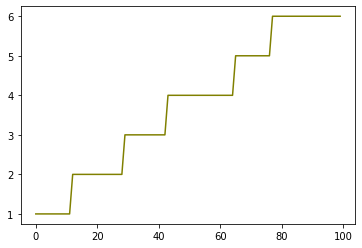

In [15]:
plt.plot(range(len(data)),data["value"], color = "olive")

In [16]:
# We see that the dice was rolled 100 times and from the graph we are able to see that all the sides of the dice appear

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
mean_calc(data["value"])

3.74

In [18]:
#Using the formula
mean_by_form = np.mean(data["value"])
print(mean_by_form)

3.74


#### 3.- Now, calculate the frequency distribution.


In [19]:
# Create a dictionary to update the frequencies of each roll
freqs_new={}

for number in data["value"]:
    if number in freqs_new:
        freqs_new[number]+=1
    else:
        freqs_new[number]=1

print(freqs_new)

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

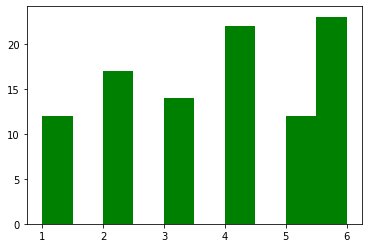

In [20]:
plt.hist(data["value"], color = "green")
plt.show()

In [21]:
#The mean is more closer to the higher values because we have more results for 4 and 6 then the others.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [22]:
data_thousand = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-understanding-descriptive-stats\\data\\roll_the_dice_thousand.csv")
data_thousand = data_thousand.sort_values(["value"])
data_thousand

,Unnamed: 0,roll,value
564,564,564,1
922,922,922,1
560,560,560,1
213,213,213,1
214,214,214,1
...,...,...,...
855,855,855,6
360,360,360,6
857,857,857,6
388,388,388,6


In [23]:
# Create a dictionary to update the frequencies of each roll
freqs_new2 ={}

for number in data_thousand["value"]:
    if number in freqs_new2:
        freqs_new2[number]+=1
    else:
        freqs_new2[number]=1

print(freqs_new2)

{1: 175, 2: 167, 3: 175, 4: 168, 5: 149, 6: 166}


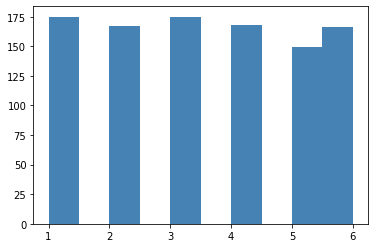

In [24]:
plt.hist(data_thousand["value"], color = "steelblue")
plt.show()

In [25]:
# With a bigger n (size), when we have more dices being rolled, we have more distribution of the values.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [26]:
ages_data = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-understanding-descriptive-stats\\data\\ages_population.csv")
#ages_data = ages_data.sort_values(["observation"])
ages_data

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [27]:
# Create a dictionary to update the frequencies of each roll
freqs_ages ={}

for number in ages_data["observation"]:
    if number in freqs_ages:
        freqs_ages[number]+=1
    else:
        freqs_ages[number]=1

print(freqs_ages)

{68.0: 3, 12.0: 11, 45.0: 29, 38.0: 30, 49.0: 19, 27.0: 25, 39.0: 45, 42.0: 32, 33.0: 22, 30.0: 34, 25.0: 19, 44.0: 23, 53.0: 12, 46.0: 23, 50.0: 16, 22.0: 16, 6.0: 2, 29.0: 26, 35.0: 33, 28.0: 20, 26.0: 23, 60.0: 4, 41.0: 36, 52.0: 14, 32.0: 30, 23.0: 17, 15.0: 8, 40.0: 27, 63.0: 7, 31.0: 24, 34.0: 29, 61.0: 2, 64.0: 2, 37.0: 30, 56.0: 15, 14.0: 10, 13.0: 6, 51.0: 9, 36.0: 31, 18.0: 7, 48.0: 19, 58.0: 7, 20.0: 13, 54.0: 13, 19.0: 11, 62.0: 4, 55.0: 13, 21.0: 14, 43.0: 32, 17.0: 10, 7.0: 1, 47.0: 17, 1.0: 2, 16.0: 8, 24.0: 18, 59.0: 8, 57.0: 7, 8.0: 5, 67.0: 4, 2.0: 2, 66.0: 3, 4.0: 1, 73.0: 1, 82.0: 1, 70.0: 1, 5.0: 2, 71.0: 1, 9.0: 2, 69.0: 1, 11.0: 3, 10.0: 3, 65.0: 2}


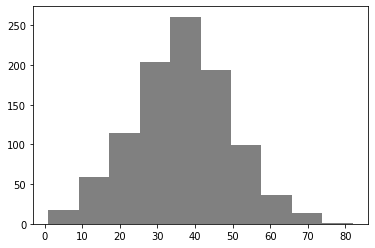

In [28]:
plt.hist(ages_data["observation"], color = "grey")
plt.show()

In [29]:
#The mean will be arround the middle of the data (range 30-40).

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [30]:
# Calculate the mean
mean_ages = np.mean(ages_data["observation"])
print("The Mean is", mean_ages)

# Calculate the Standard Deviation
std_ages = np.std(ages_data["observation"])
print("The Standard Deviation is", std_ages)

The Mean is 36.56
The Standard Deviation is 12.810089773299795


In [31]:
# For the mean I was pretty sure about it regarding the STD I was not sure of it.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [32]:
ages_data2 = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-understanding-descriptive-stats\\data\\ages_population2.csv")
#ages_data = ages_data.sort_values(["observation"])
ages_data2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [33]:
# Create a dictionary to update the frequencies of each roll
freqs_ages2 ={}

for number in ages_data2["observation"]:
    if number in freqs_ages2:
        freqs_ages2[number]+=1
    else:
        freqs_ages2[number]=1

print(freqs_ages2)

{25.0: 98, 31.0: 61, 29.0: 115, 28.0: 139, 30.0: 90, 24.0: 78, 26.0: 120, 21.0: 17, 27.0: 125, 23.0: 41, 22.0: 35, 32.0: 31, 20.0: 13, 33.0: 22, 19.0: 3, 34.0: 7, 35.0: 3, 36.0: 2}


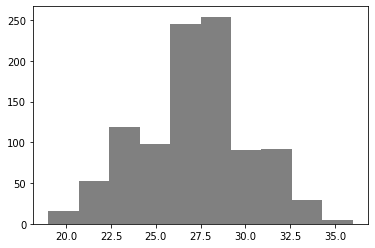

In [34]:
plt.hist(ages_data2["observation"], color = "grey")
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [35]:
# In this last case we have less ages in the data so the values are more concentrated then the first one.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [36]:
# Calculate the mean
mean_ages2 = np.mean(ages_data2["observation"])
print("The Mean is", mean_ages2)

# Calculate the Standard Deviation
std_ages2 = np.std(ages_data2["observation"])
print("The Standard Deviation is", std_ages2)

The Mean is 27.155
The Standard Deviation is 2.9683286543103677


In [37]:
# The STD is less because we have less ages options than in the first one and the mean is more a less in the middle of the data,
# as we can see in the hist graph.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [38]:
ages_data3 = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-understanding-descriptive-stats\\data\\ages_population3.csv")
#ages_data = ages_data.sort_values(["observation"])
ages_data3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [39]:
# Create a dictionary to update the frequencies of each roll
freqs_ages3 ={}

for number in ages_data3["observation"]:
    if number in freqs_ages3:
        freqs_ages3[number]+=1
    else:
        freqs_ages3[number]=1

print(freqs_ages3)

{21.0: 14, 24.0: 19, 31.0: 21, 54.0: 9, 52.0: 17, 37.0: 31, 69.0: 17, 36.0: 26, 30.0: 24, 64.0: 12, 76.0: 1, 73.0: 6, 42.0: 14, 67.0: 22, 28.0: 18, 50.0: 21, 70.0: 19, 57.0: 8, 20.0: 11, 27.0: 19, 51.0: 14, 56.0: 10, 44.0: 17, 49.0: 18, 65.0: 15, 32.0: 37, 18.0: 9, 45.0: 24, 40.0: 21, 66.0: 19, 72.0: 8, 43.0: 22, 48.0: 25, 35.0: 31, 41.0: 25, 17.0: 10, 23.0: 11, 47.0: 15, 33.0: 17, 15.0: 8, 26.0: 15, 75.0: 2, 29.0: 25, 55.0: 13, 63.0: 12, 39.0: 29, 46.0: 22, 22.0: 11, 71.0: 11, 68.0: 17, 60.0: 6, 34.0: 20, 61.0: 6, 12.0: 4, 38.0: 25, 74.0: 6, 25.0: 17, 53.0: 14, 62.0: 3, 59.0: 8, 19.0: 12, 77.0: 2, 14.0: 5, 16.0: 9, 1.0: 1, 11.0: 2, 13.0: 2, 9.0: 1, 10.0: 2, 2.0: 2, 8.0: 1, 58.0: 6, 4.0: 2, 5.0: 1, 7.0: 1}


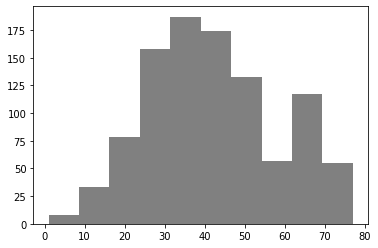

In [40]:
plt.hist(ages_data3["observation"], color = "grey")
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [41]:
# Calculate the mean
mean_ages3 = np.mean(ages_data3["observation"])
print("The Mean is", mean_ages3)

# Calculate the Standard Deviation
std_ages3 = np.std(ages_data3["observation"])
print("The Standard Deviation is", std_ages3)

The Mean is 41.989
The Standard Deviation is 16.13663158778808


In [42]:
#The first plot the ages one more concentrated in the middle and in the one we still have a lot of age concentration is the
#middle but we have also a lot of people in the range 60-70 that increases the Mean and the Standard Deviation.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [46]:
q1 = np.quantile(ages_data3["observation"], 0.25)
print("the first quartile is", q1)

q2 = np.quantile(ages_data3["observation"], 0.5)
print("the second quartile / median is", q2)

q3 = np.quantile(ages_data3["observation"], 0.75)
print("the third quartile is", q3)

q4 = np.quantile(ages_data3["observation"], 1)
print("the fouth quartile is", q4)

the first quartile is 30.0
the second quartile / median is 40.0
the third quartile is 53.0
the fouth quartile is 77.0


In [47]:
# The Median and the Mean are similar, their difference is very small (less than 2).

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [48]:
perc_95 = np.percentile(ages_data3["observation"], 95)
perc_90 = np.percentile(ages_data3["observation"], 90)
perc_85 = np.percentile(ages_data3["observation"], 85)
perc_80 = np.percentile(ages_data3["observation"], 80)
perc_60 = np.percentile(ages_data3["observation"], 60)
perc_40 = np.percentile(ages_data3["observation"], 40)

print(perc_95, perc_90, perc_85, perc_80, perc_60, perc_40)

70.0 67.0 64.0 57.0 45.0 36.0


In [50]:
# the ages are more concentrated on older people, as the 75% of the people have at least 30 years.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""